In [29]:
import pandas as pd
import numpy as np
from natsort import natsorted
import os

# folder_path = 'shell_f3_testing_script_results/'

# combined_data = pd.DataFrame()

# for dirpath, dirnames, filenames in os.walk(folder_path):
#     for filename in filenames:
#         file_path = os.path.join(dirpath, filename)
#         # Check if the item is a file and ends with '.txt'
#         if os.path.isfile(file_path) and filename.endswith('.txt'):
#             # Read the text file into a DataFrame
#             df = pd.read_csv(file_path, sep=';', header=None)
#             # Concatenate the current DataFrame with the combined_data
#             combined_data = pd.concat([combined_data, df], axis=1, ignore_index=True)



# combined_data.shape
# dataset = combined_data.to_numpy()

# dataset = np.reshape(dataset, (3,-1,18))
# dataset.shape

def read_and_concatenate_data(folder_path):
    result = pd.DataFrame()

    for dirpath, dirnames, filenames in os.walk(folder_path):
        filenames = natsorted(filenames)
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Check if the item is a file and ends with '.txt'
            if os.path.isfile(file_path) and filename.endswith('.txt'):
                # Read the text file into a DataFrame
                df = pd.read_csv(file_path, sep=';', header=None)
                # Concatenate the current DataFrame with the result
                result = pd.concat([result, df], axis=1, ignore_index=True)

    return result

dtag_folder_path = 'shell_f3_testing_script_results/dtag_script_results/'
dtap_folder_path = 'shell_f3_testing_script_results/dtap_script_results/'
cbls_folder_path = 'shell_f3_testing_script_results/cbls_script_results/'
cbls_m_folder_path = 'shell_f3_testing_script_results/cbls_m_script_results/'
sebs_folder_path = 'shell_f3_testing_script_results/sebs_script_results/'

# Call the function for each variable
dtag = read_and_concatenate_data(dtag_folder_path)
dtap = read_and_concatenate_data(dtap_folder_path)
cbls = read_and_concatenate_data(cbls_folder_path)
cbls_m = read_and_concatenate_data(cbls_m_folder_path)
sebs = read_and_concatenate_data(sebs_folder_path)

result_concatenated = pd.concat([dtag, dtap, cbls, cbls_m, sebs], axis=0)

dataset = result_concatenated.to_numpy()
# dataset = dtag.to_numpy()



dataset = np.reshape(dataset, (5,3,-1,18))
# dataset


In [37]:
successful_counts = np.zeros((5,6,3,18))

for algo in range(5):
    for j, data in enumerate(dataset[algo,2,:,:]):
        for i in range(len(data)):
            if data[i] == 1:
                successful_counts[algo,j%18//3,0,i] += 1
            elif (data[i] == 0):
                successful_counts[algo,j%18//3,1,i] += 1
            else:
                successful_counts[algo,j%18//3,2,i] += 1


successful_counts.shape

(5, 6, 3, 18)

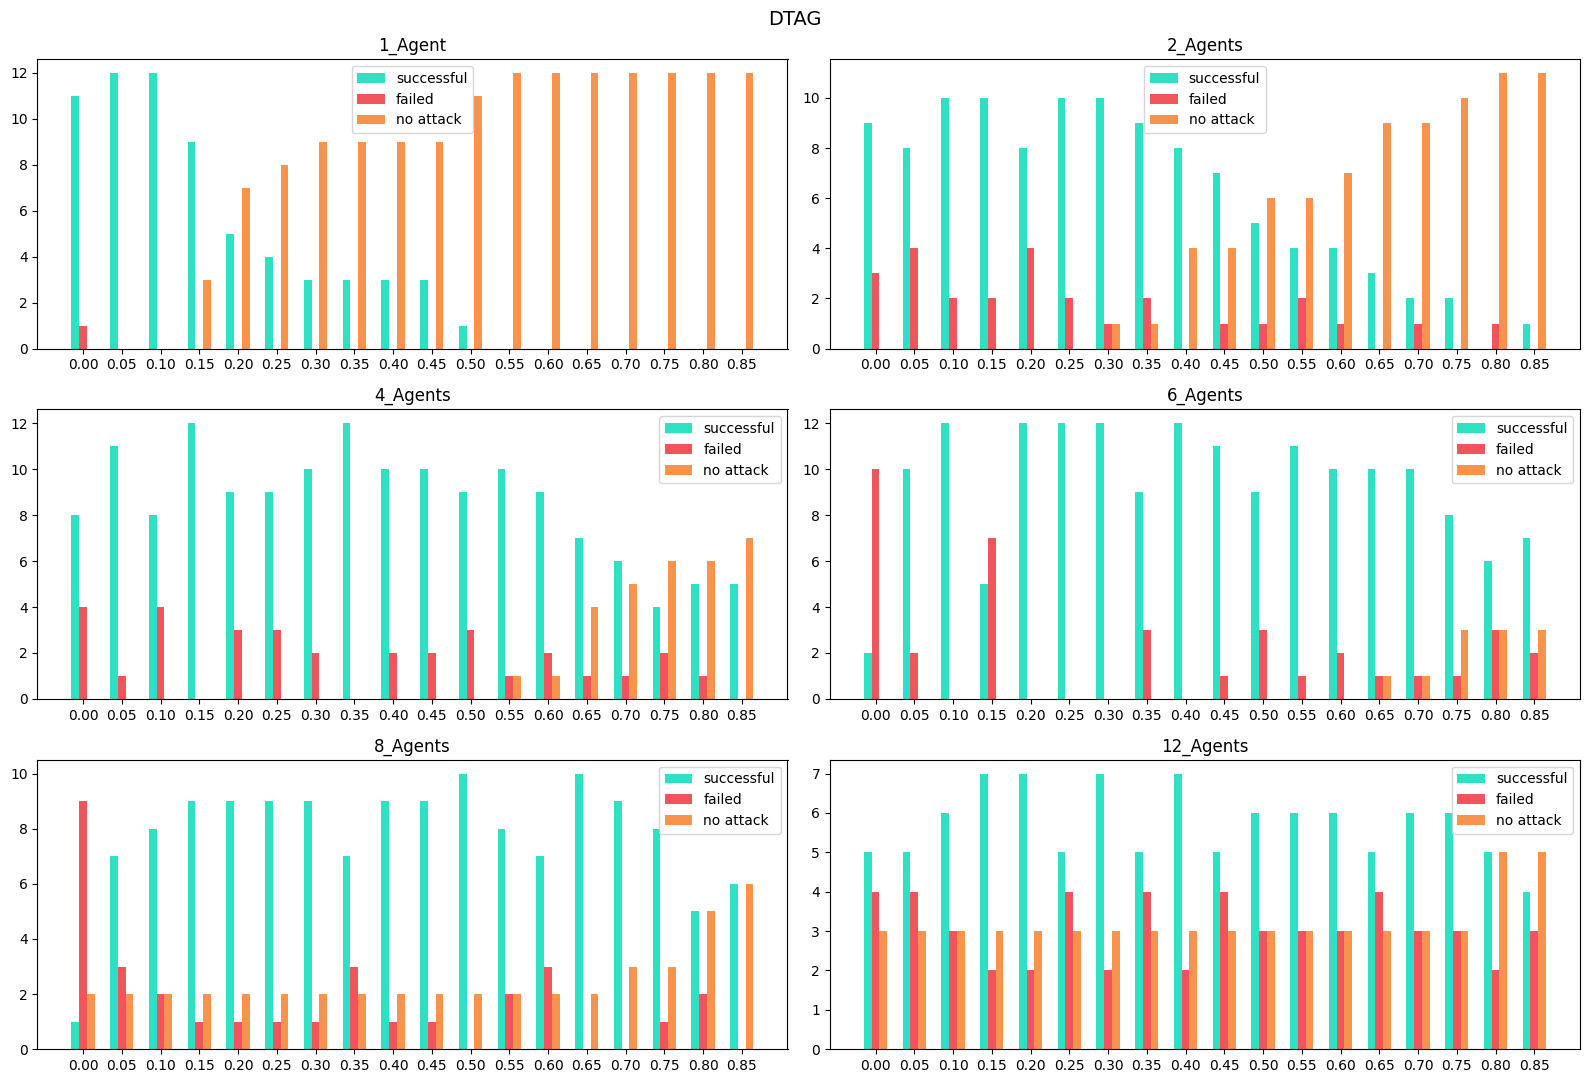

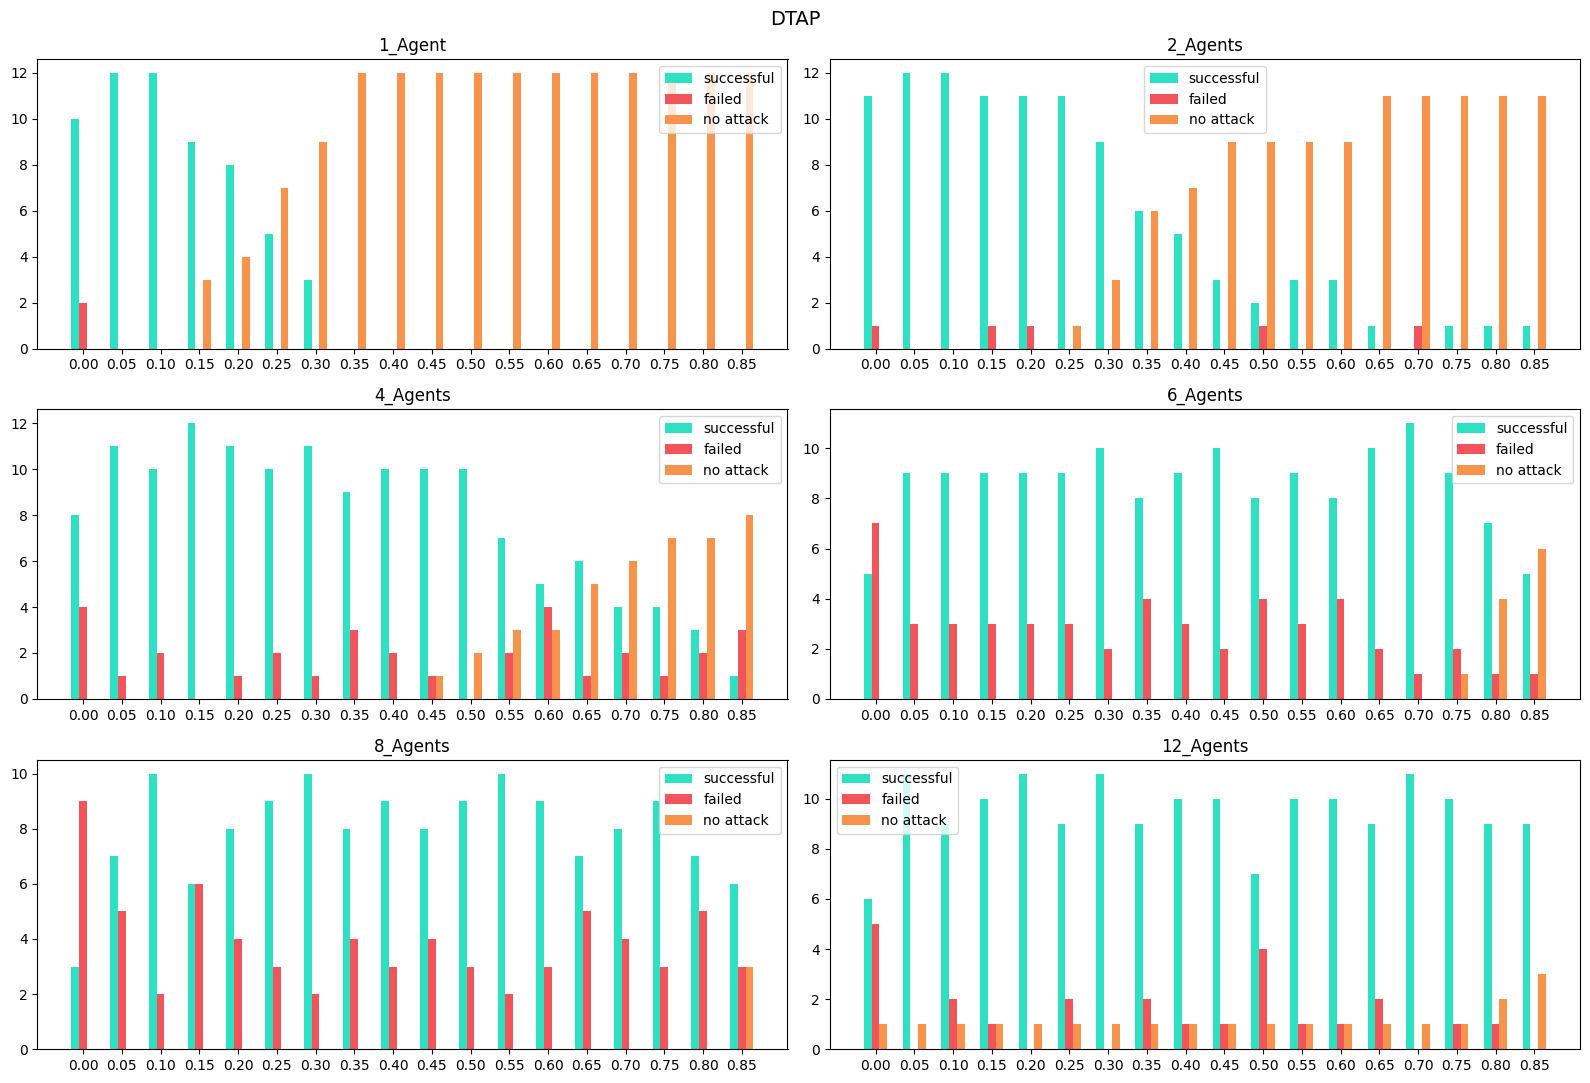

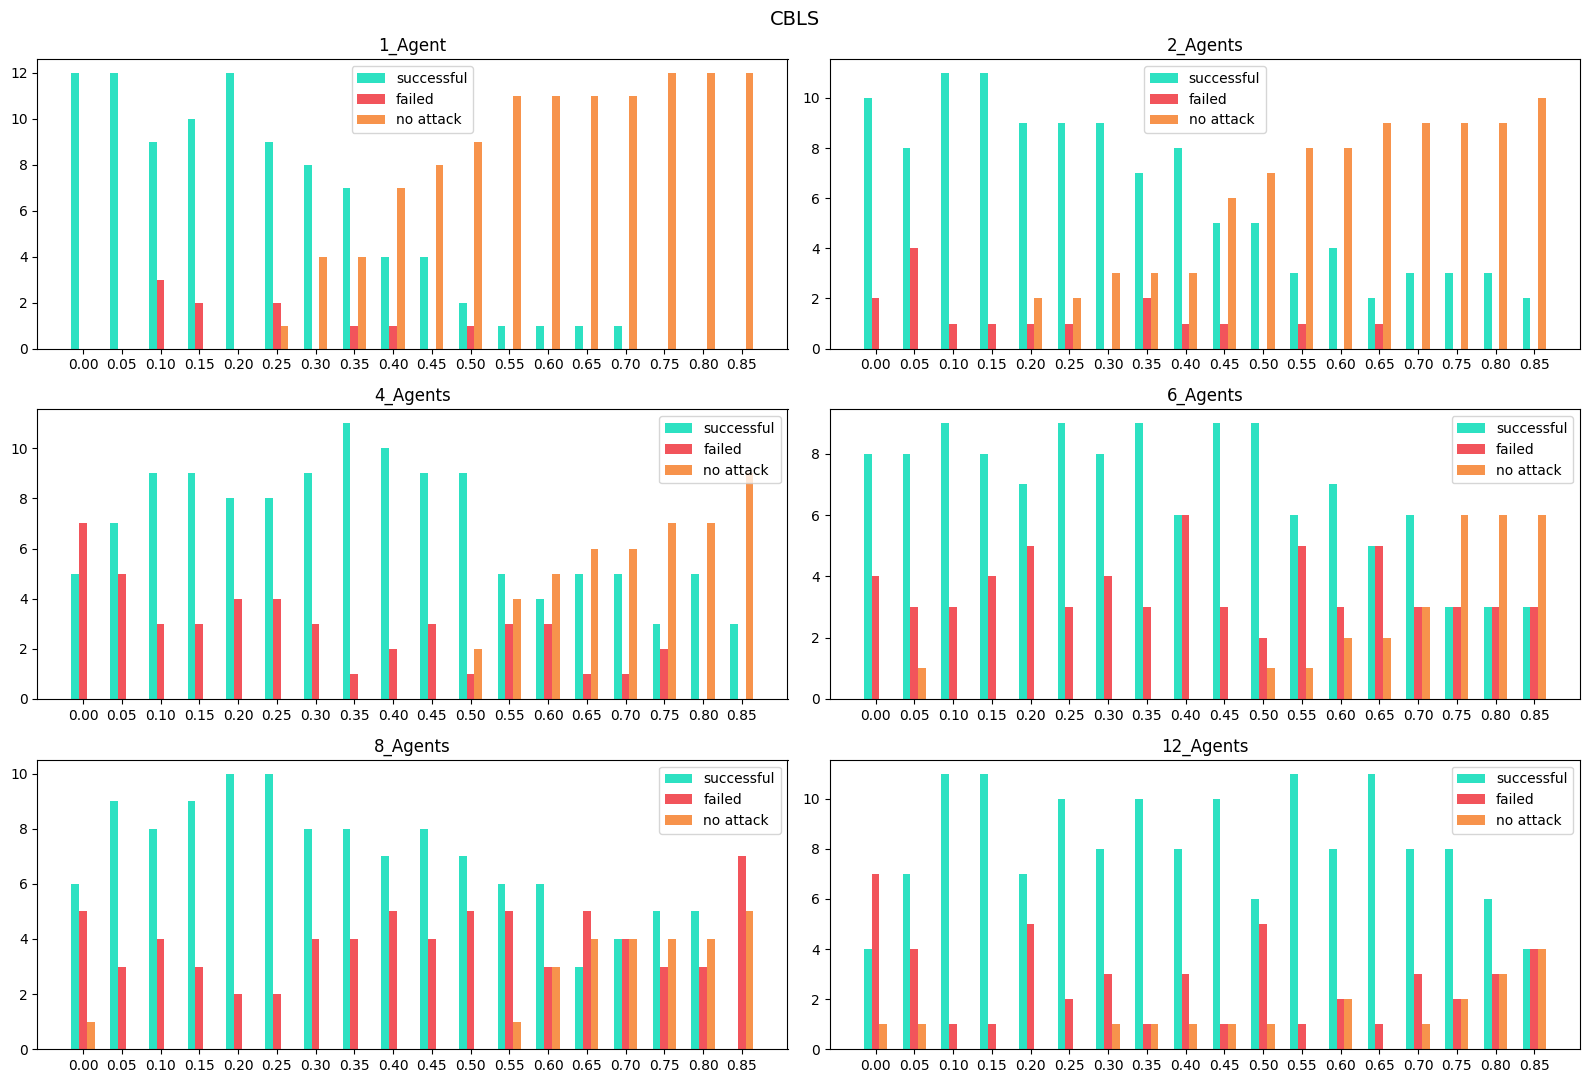

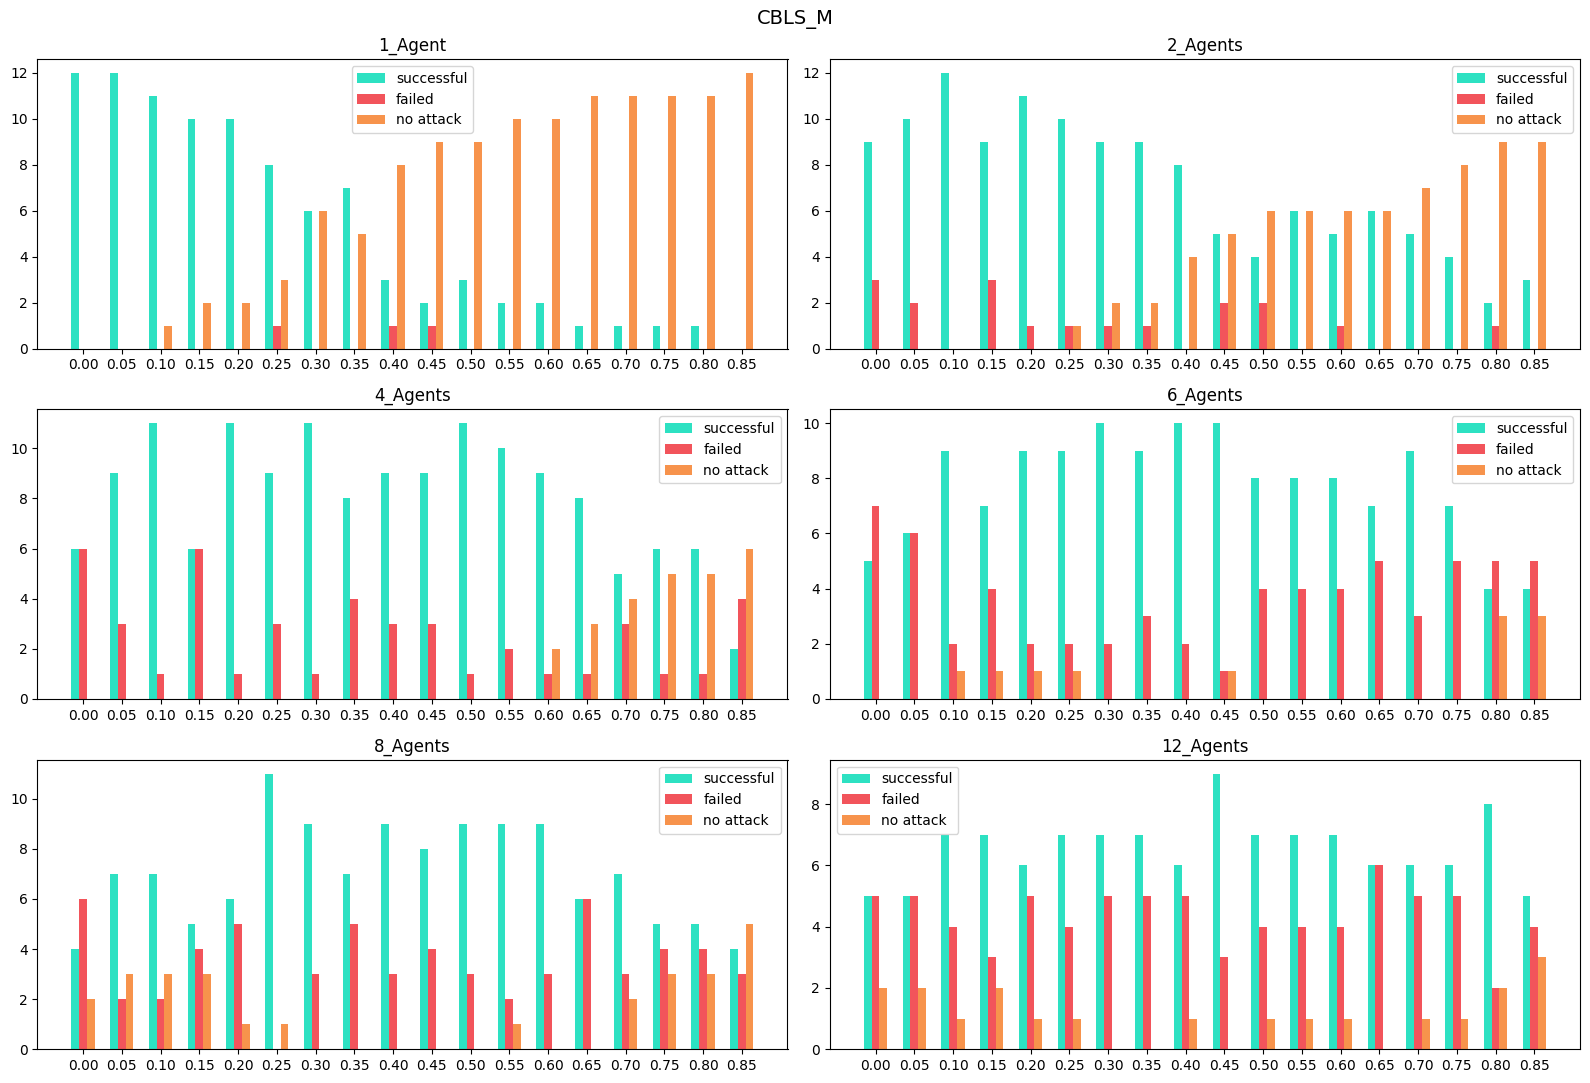

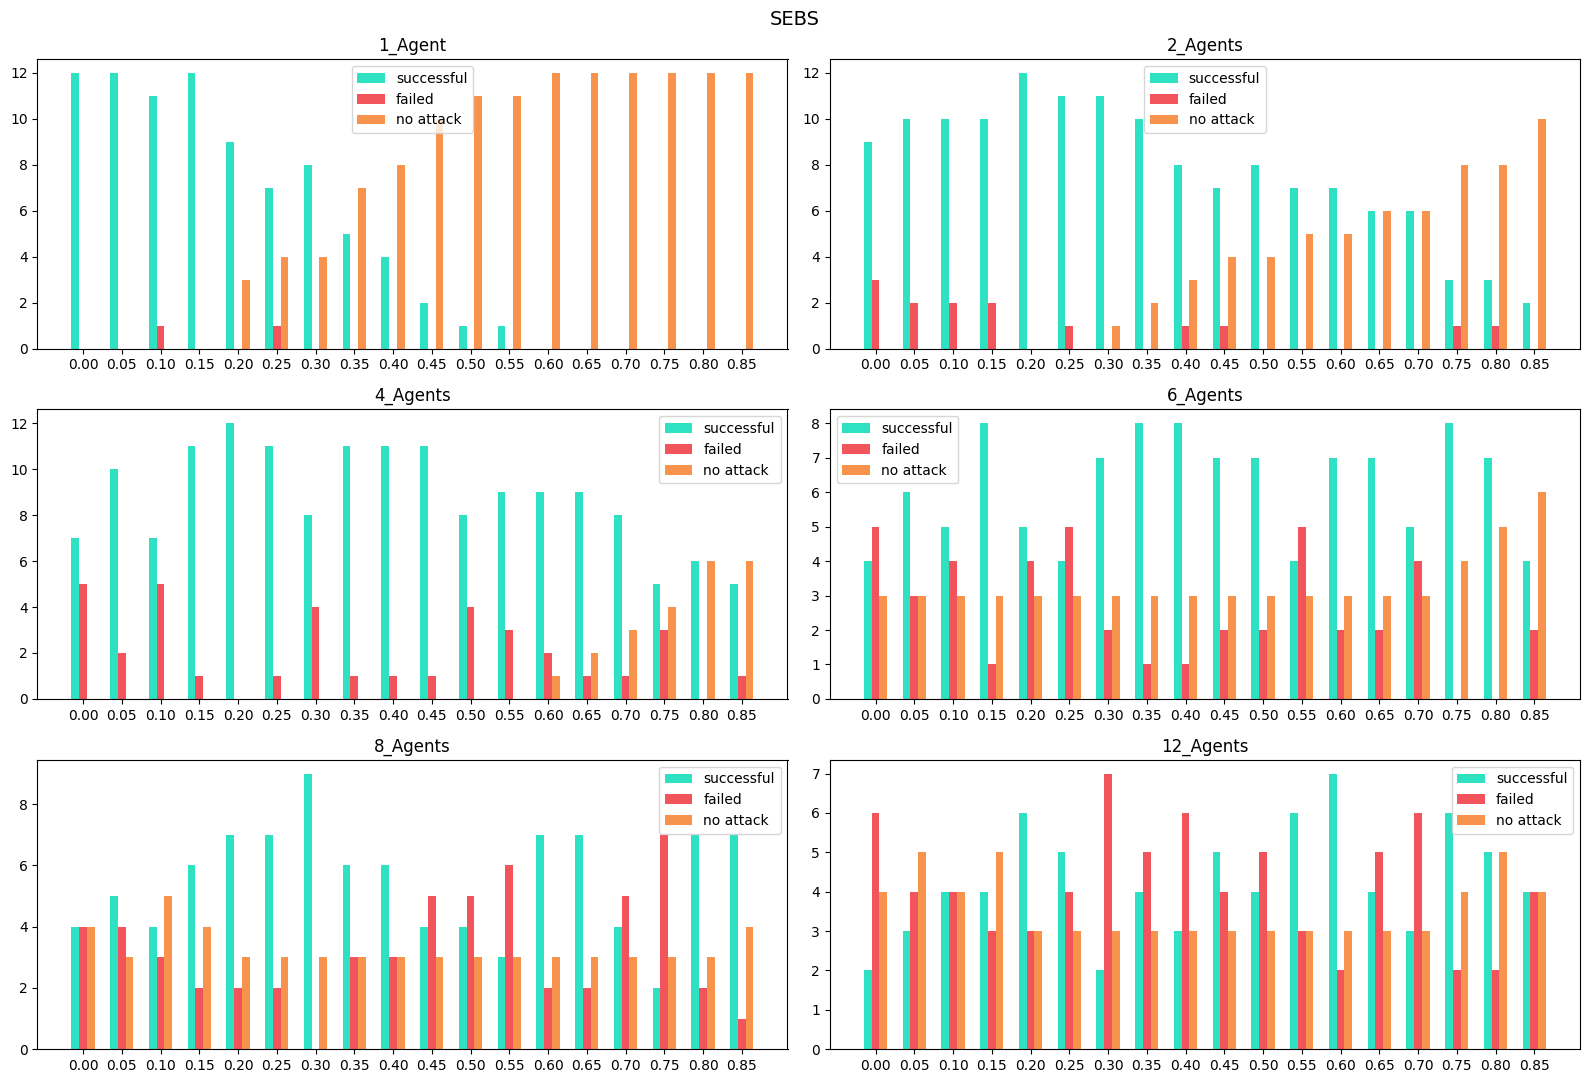

In [38]:
import matplotlib.pyplot as plt
import numpy as np


for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# for j, algo in enumerate(['DTAG']):


    agents = np.arange(1, 19)
    maps = ['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents']

    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 11))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents - 1 * (bar_width + gap)

        color1 = '#2DE1C2'  # Replace with your desired color code
        color2 = '#F2545B'  # Replace with your desired color code
        color3 = '#F7934C'

        ax.bar(positions, successful_counts[j, i, 0,:], width=bar_width, color=color1, label = 'successful')
        ax.bar(positions + bar_width + gap, successful_counts[j, i, 1,:], width=bar_width, color=color2, label = 'failed')
        ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, 2,:], width=bar_width, color=color3, label = 'no attack')


        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        # ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.set_xticklabels(['{:.2f}'.format(x) for x in np.arange(0, 0.90, 0.05)])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()

In [39]:
successful_counts = np.zeros((6,3,18))

for algo in range(5):
    for j, data in enumerate(dataset[algo,2,:,:]):
        for i in range(len(data)):
            if data[i] == 1:
                successful_counts[j%18//3,0,i] += 1
            elif (data[i] == 0):
                successful_counts[j%18//3,1,i] += 1
            else:
                successful_counts[j%18//3,2,i] += 1


successful_counts.shape

(6, 3, 18)

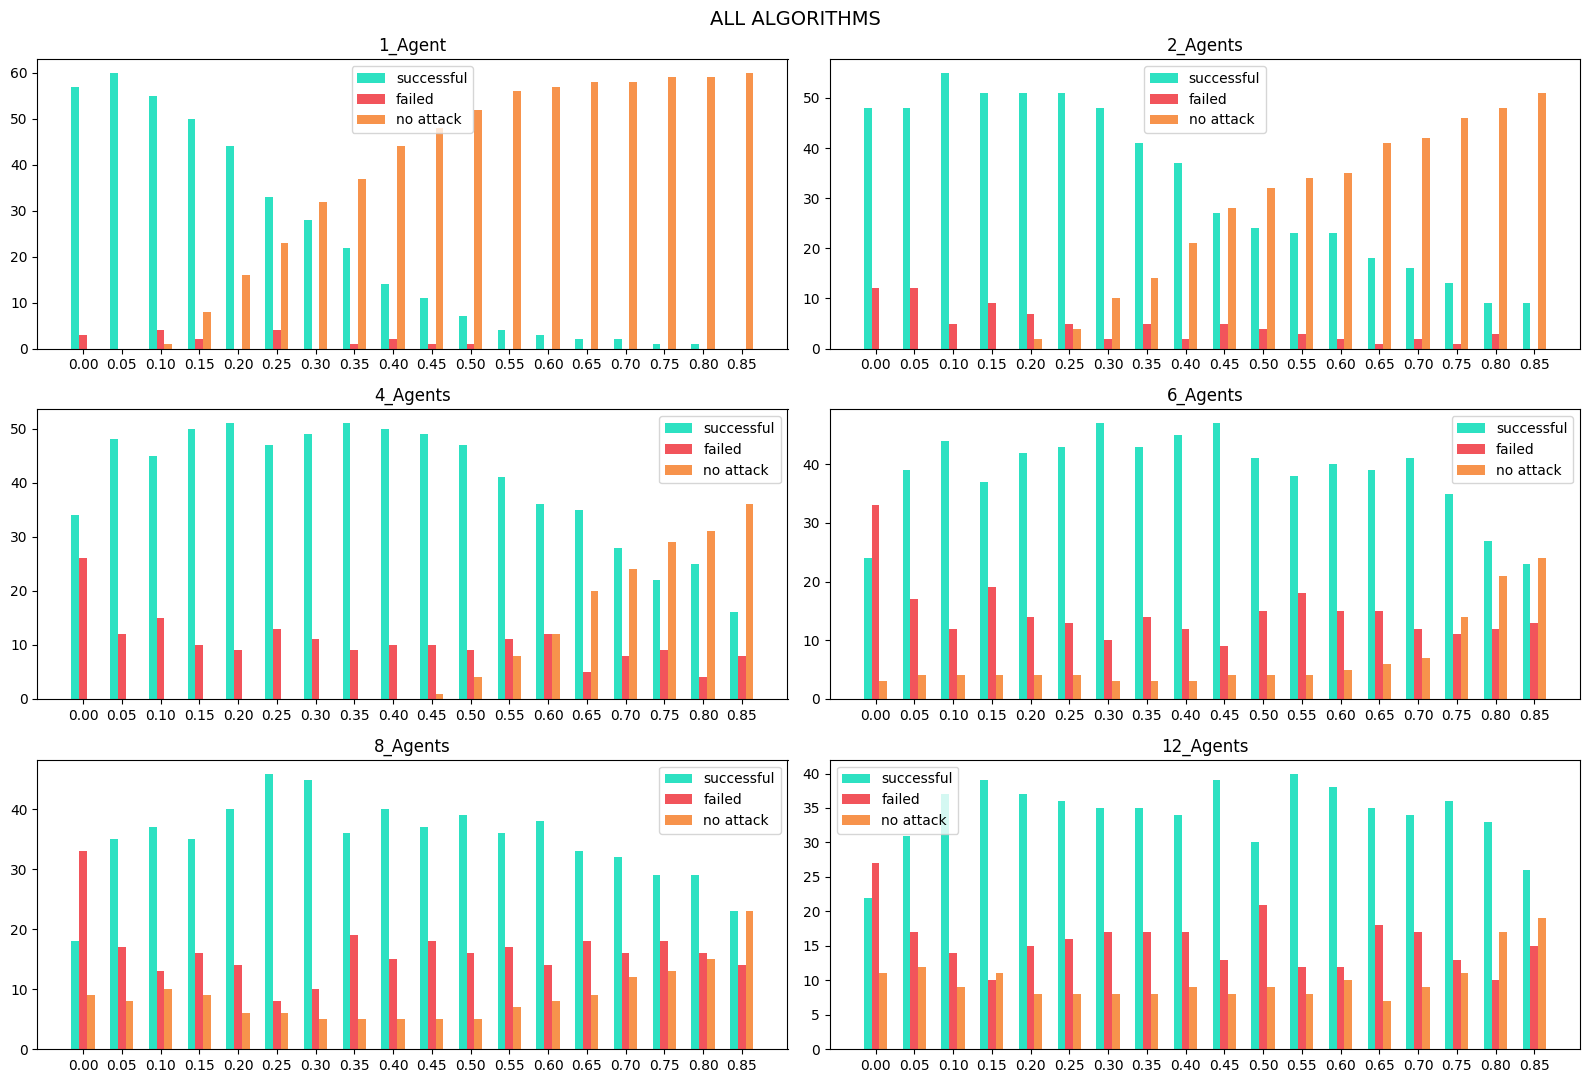

In [41]:
# for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
for j, algo in enumerate(['ALL ALGORITHMS']):


    agents = np.arange(1, 19)
    maps = ['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents']

    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 11))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents - 1 * (bar_width + gap)

        color1 = '#2DE1C2'  # Replace with your desired color code
        color2 = '#F2545B'  # Replace with your desired color code
        color3 = '#F7934C'

        ax.bar(positions, successful_counts[i, 0,:], width=bar_width, color=color1, label = 'successful')
        ax.bar(positions + bar_width + gap, successful_counts[i, 1,:], width=bar_width, color=color2, label = 'failed')
        ax.bar(positions + 2*bar_width + gap, successful_counts[i, 2,:], width=bar_width, color=color3, label = 'no attack')


        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        # ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.set_xticklabels(['{:.2f}'.format(x) for x in np.arange(0, 0.90, 0.05)])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()

In [42]:
successful_counts = np.zeros((4,6,3,18))

for algo in range(5):
    for j, data in enumerate(dataset[algo,2,:,:]):
        for i in range(len(data)):
            if data[i] == 1:
                successful_counts[j//18,j%18//3,0,i] += 1
            elif (data[i] == 0):
                successful_counts[j//18,j%18//3,1,i] += 1
            else:
                successful_counts[j//18,j%18//3,2,i] += 1


successful_counts.shape

(4, 6, 3, 18)

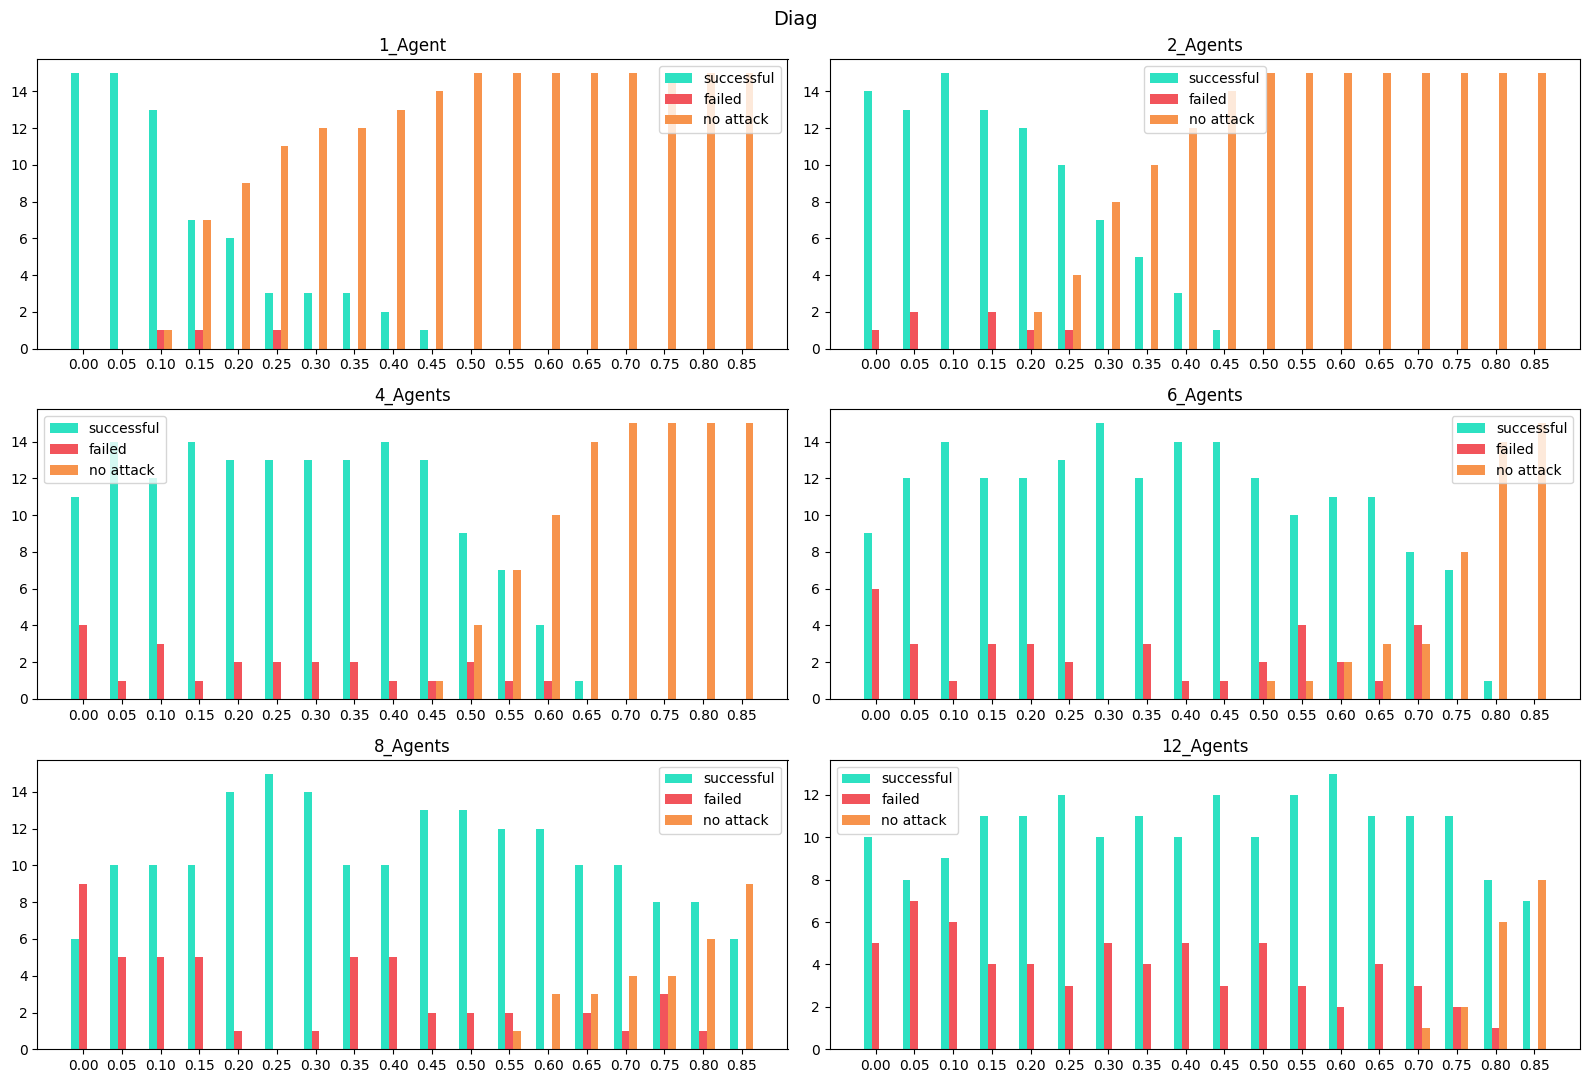

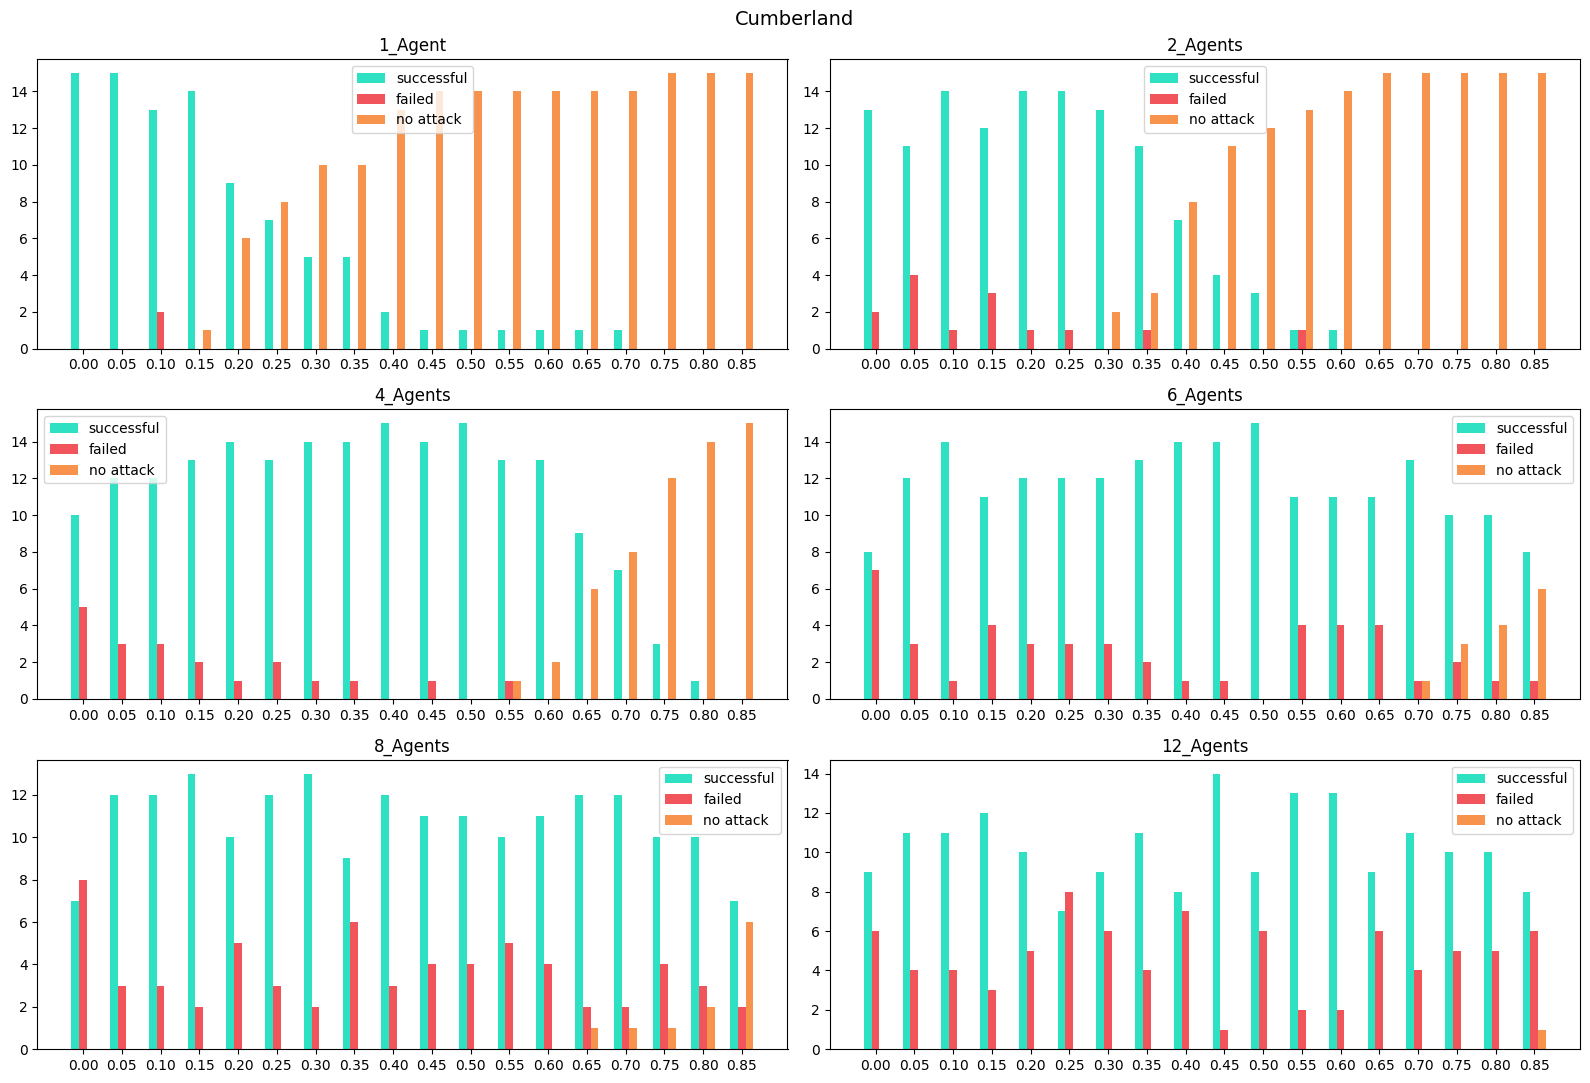

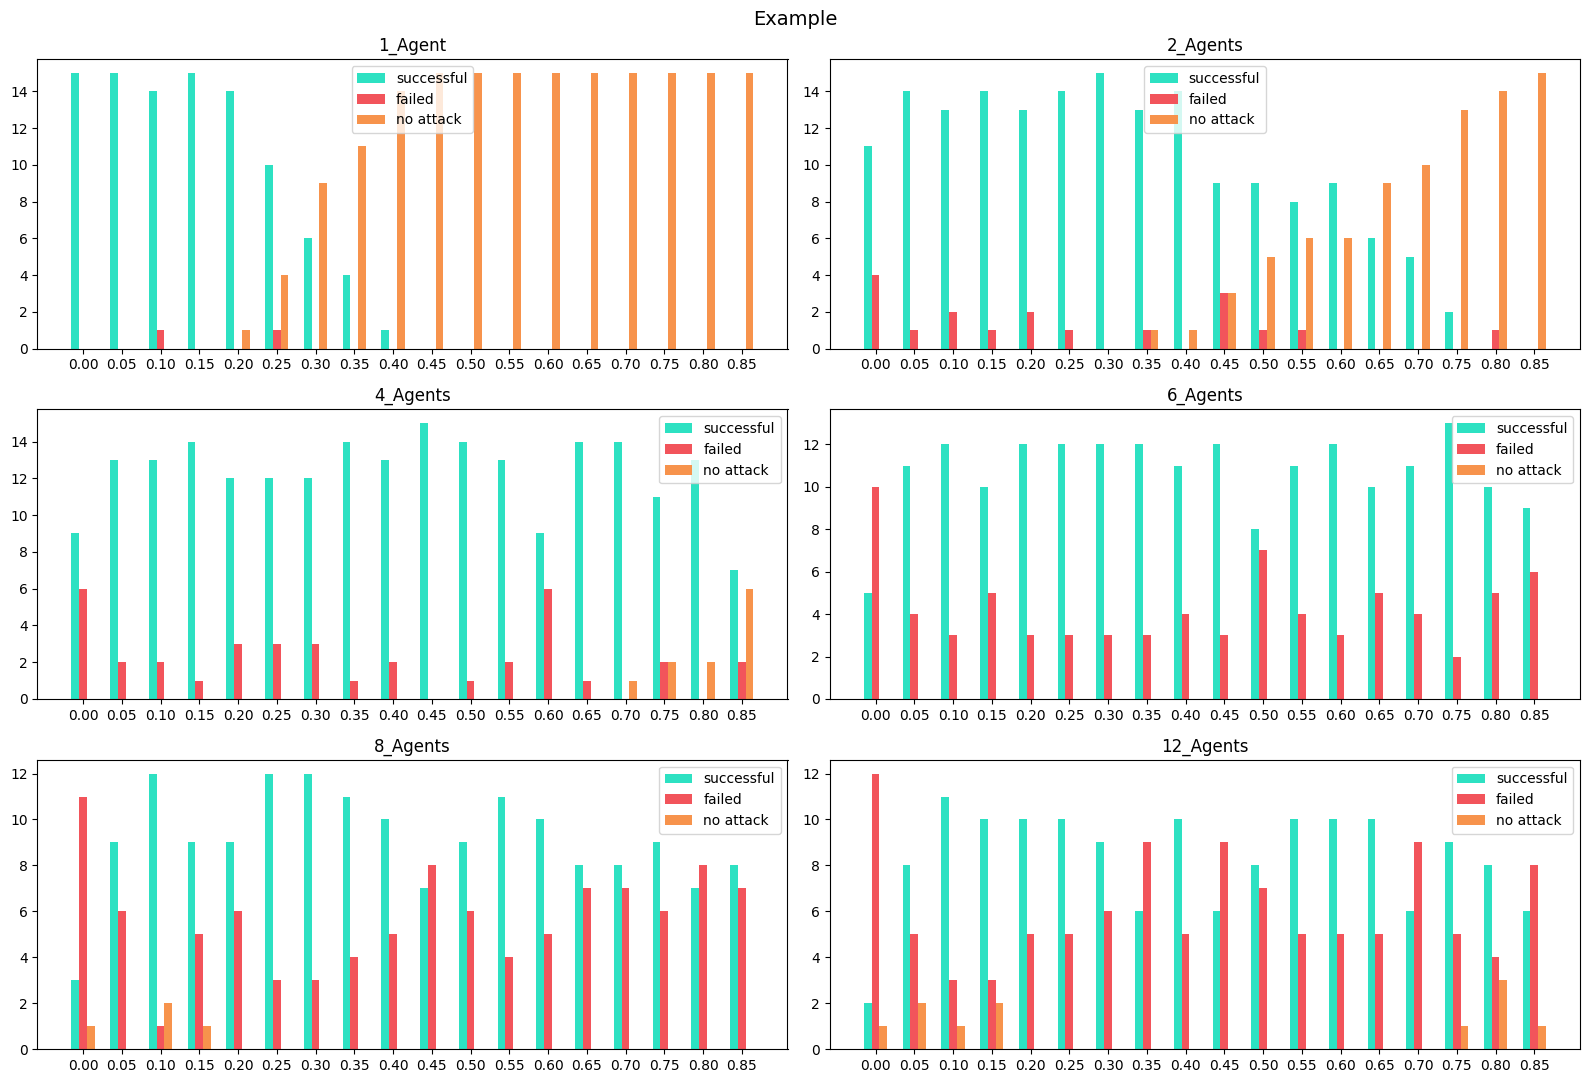

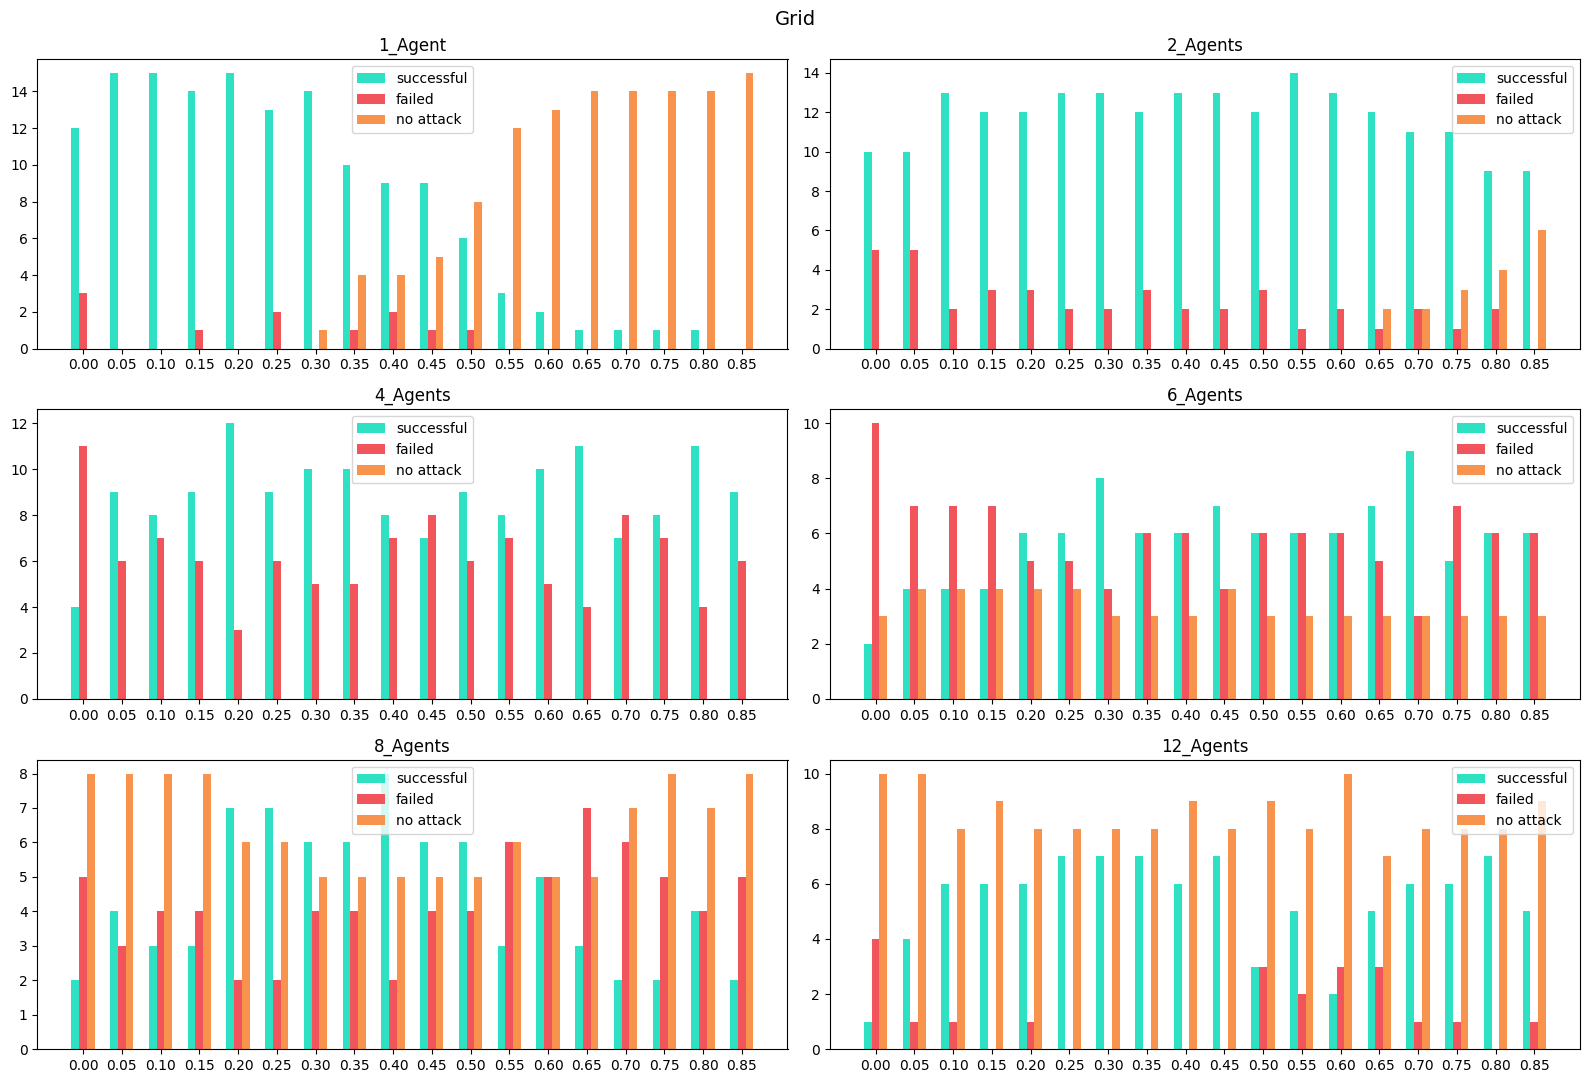

In [43]:
import matplotlib.pyplot as plt
import numpy as np


for j, algo in enumerate(['Diag','Cumberland','Example','Grid']):
# for j, algo in enumerate(['DTAG']):


    agents = np.arange(1, 19)
    maps = ['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents']

    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 11))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents - 1 * (bar_width + gap)

        color1 = '#2DE1C2'  # Replace with your desired color code
        color2 = '#F2545B'  # Replace with your desired color code
        color3 = '#F7934C'

        ax.bar(positions, successful_counts[j, i, 0,:], width=bar_width, color=color1, label = 'successful')
        ax.bar(positions + bar_width + gap, successful_counts[j, i, 1,:], width=bar_width, color=color2, label = 'failed')
        ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, 2,:], width=bar_width, color=color3, label = 'no attack')


        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        # ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.set_xticklabels(['{:.2f}'.format(x) for x in np.arange(0, 0.90, 0.05)])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()

In [32]:
successful_counts = np.zeros((5,4,6,3))

for algo in range(5):
    for j, data in enumerate(dataset[algo,2,:,:]):
        for i in range(len(data)):
            if data[i] == 1:
                successful_counts[algo,j//18,j%18//3,0] += 1
            elif (data[i] == 0):
                successful_counts[algo,j//18,j%18//3,1] += 1
            else:
                successful_counts[algo,j//18,j%18//3,2] += 1


successful_counts.shape

(5, 4, 6, 3)

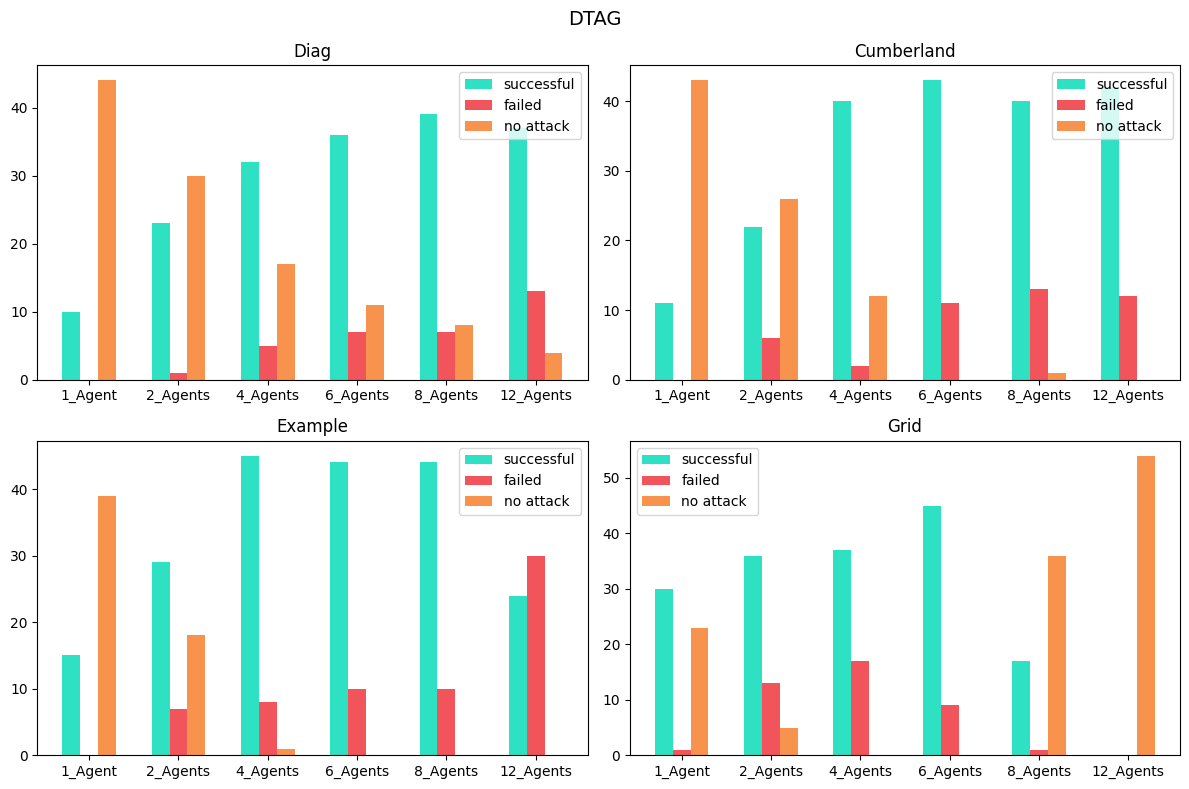

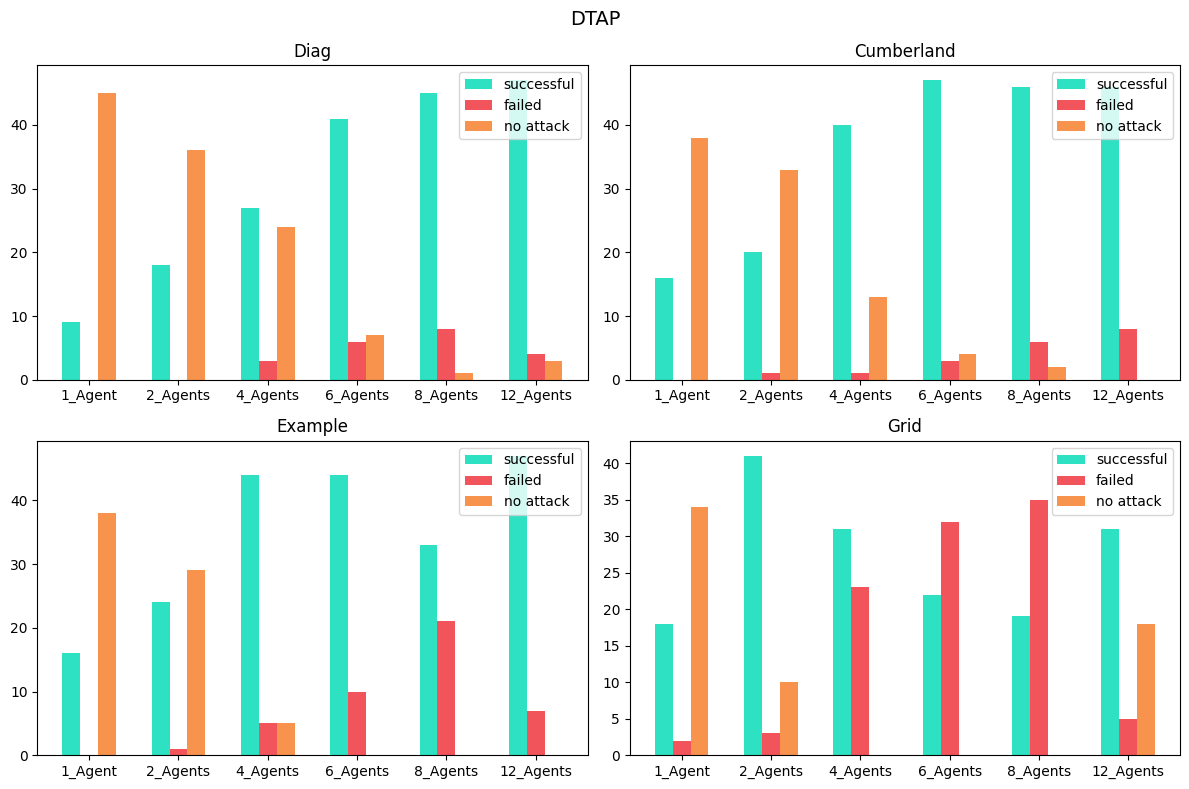

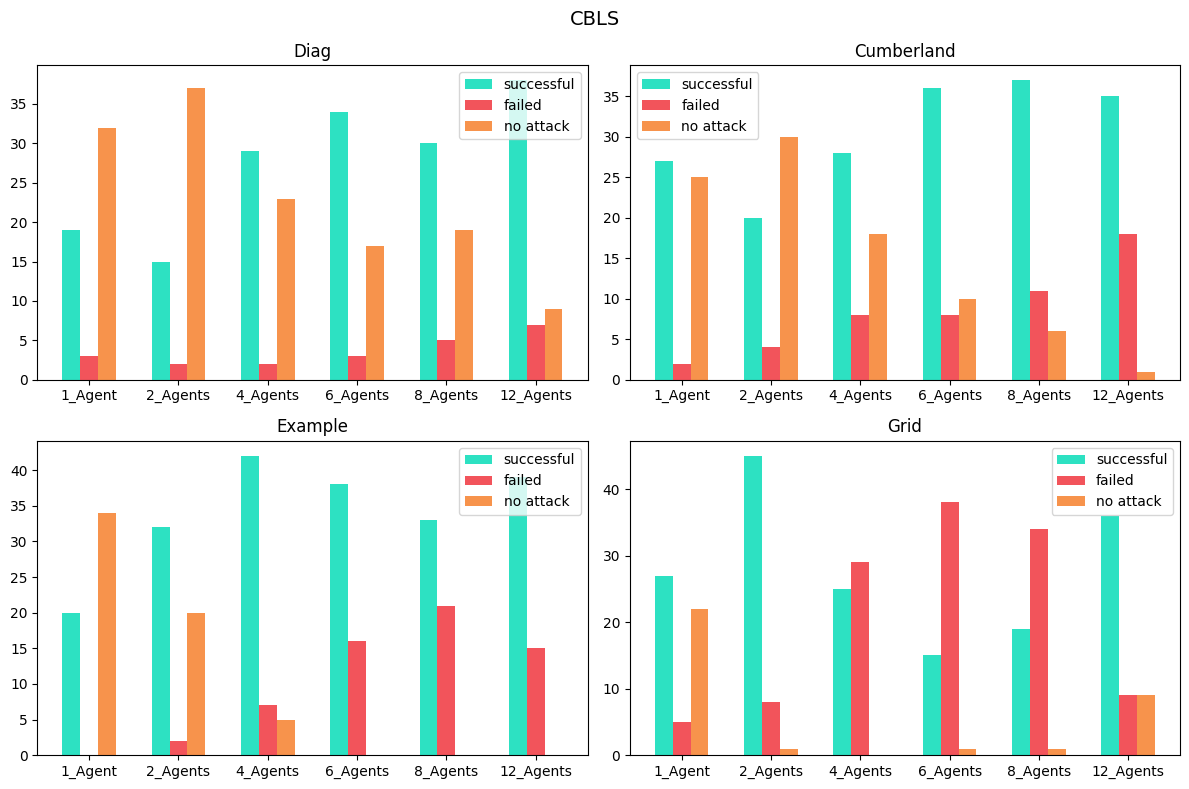

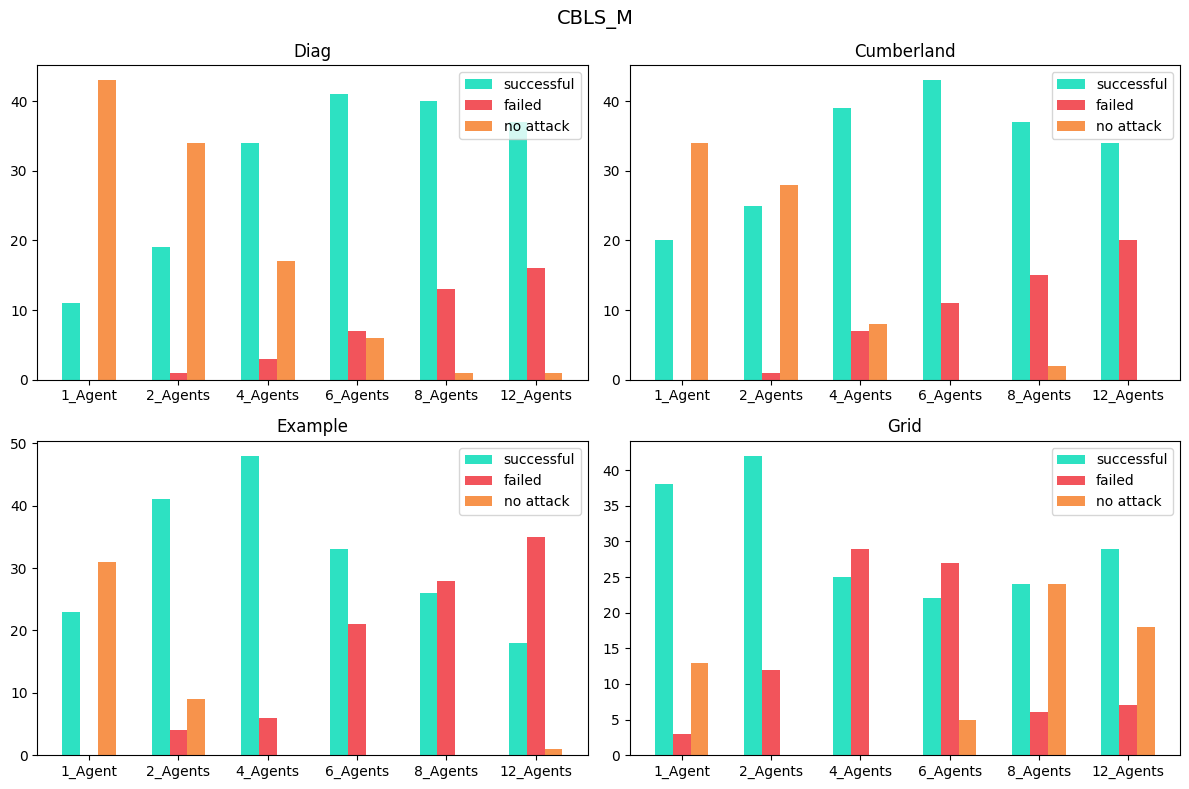

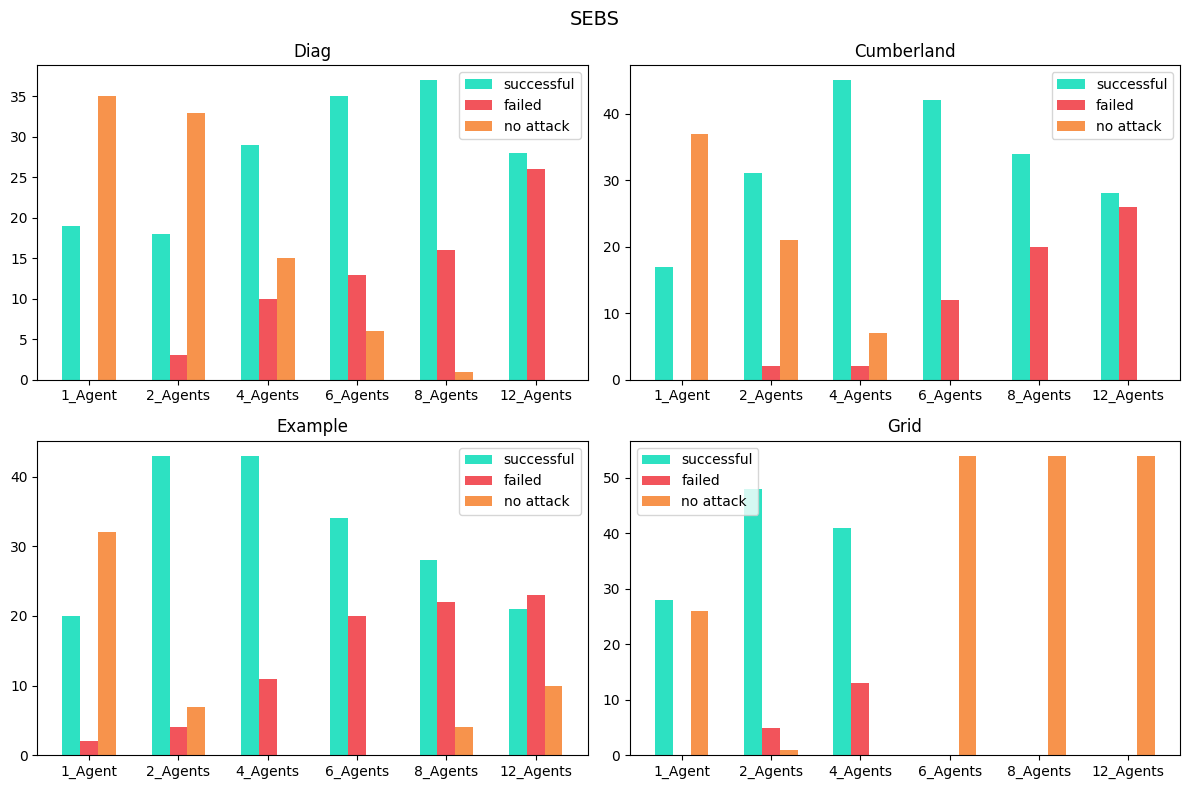

In [33]:
import matplotlib.pyplot as plt
import numpy as np


for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# for j, algo in enumerate(['DTAG']):


    agents = np.arange(1, 7)
    maps = ['Diag', 'Cumberland', 'Example', 'Grid']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents - 1 * (bar_width + gap)

        color1 = '#2DE1C2'  # Replace with your desired color code
        color2 = '#F2545B'  # Replace with your desired color code
        color3 = '#F7934C'

        ax.bar(positions, successful_counts[j, i, :, 0], width=bar_width, color=color1, label = 'successful')
        ax.bar(positions + bar_width + gap, successful_counts[j, i, :, 1], width=bar_width, color=color2, label = 'failed')
        ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], width=bar_width, color=color3, label = 'no attack')


        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()

In [34]:
average_times = np.zeros(dataset.shape[-1])
for data in dataset[0]:
    for i in range(len(data)):
        if str(data[i]) != 'nan':
            average_times[i] += (data[i]/dataset.shape[1])
        else:
            average_times[i] += (2000/dataset.shape[1])
average_times

ValueError: setting an array element with a sequence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


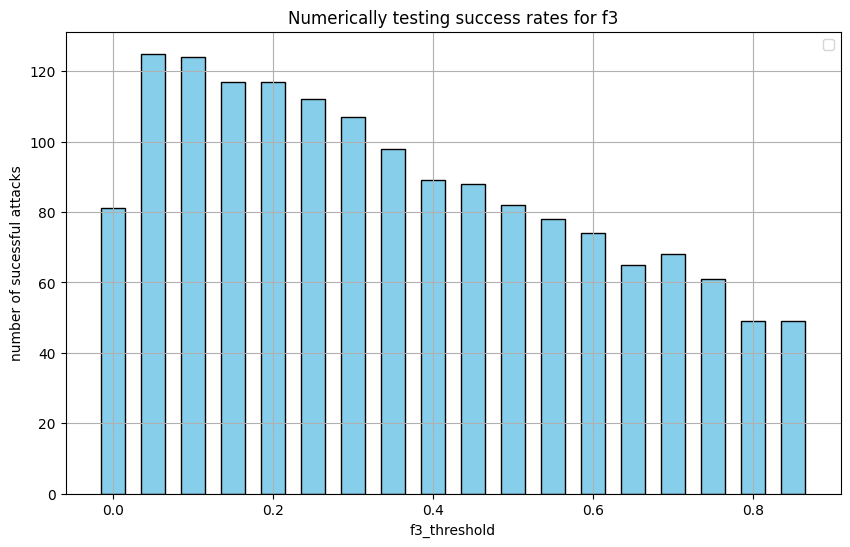

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.bar(np.arange(0,0.9,0.05), successful_counts, width=bar_width, color='skyblue', edgecolor='black')

plt.title('Numerically testing success rates for f3')
plt.xlabel('f3_threshold')
plt.ylabel('number of sucessful attacks')
plt.legend()
plt.savefig("01_f3_threshold_varying_success.png")
plt.show()

Text(0, 0.5, 'average time of attacks')

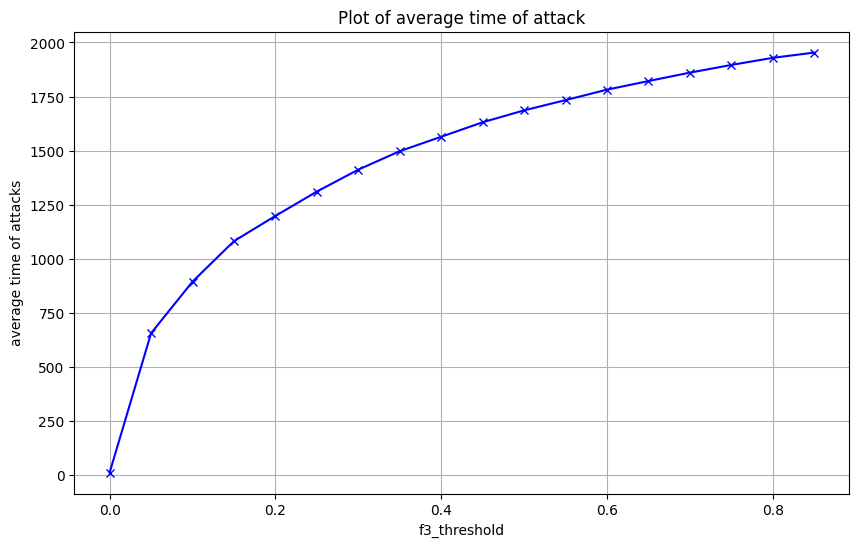

In [ ]:
plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.plot(np.arange(0, 0.9, 0.05), average_times, color='blue',marker='x')

plt.title('Plot of average time of attack')
plt.xlabel('f3_threshold')
plt.ylabel('average time of attacks')